# Versuch 213: Kreisel

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## Aufgabe 2: Bestimmung der Dämpfungskonstante

k = (6.78 +/- 0.10)*10^(-4)/s
T = (1022 +/- 16)s


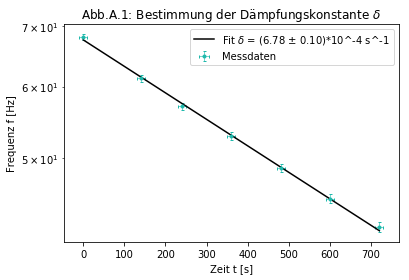

In [3]:
t = np.array([0,140,240,360,480,600,720])
dt = 10
f = np.array([650,585,545,505,465,430,400])/60
df = 5/60
w = 2*np.pi*f
dw = 2*np.pi*df

plt.errorbar(t,w,dw,dt,".", elinewidth = 0.6, capsize = 1.5, color="#1FB9AC", label="Messdaten")
plt.yscale("log")
           
def fit_func(x,A,k):
    return A*np.exp(-k*x)
                    
popt,pcov = curve_fit(fit_func, t, w, p0 = [w[0], 0])
plt.plot(t, fit_func(t,*popt), color="black", label=r"Fit $\delta$ = ({:.2f} $\pm$ {:.2f})*10^-4 s^-1".format(popt[1]*10**4,np.sqrt(pcov[1,1])*10**4))

print("k = ({:.2f} +/- {:.2f})*10^(-4)/s".format(popt[1]*10**4,np.sqrt(pcov[1,1])*10**4))
                    
plt.title("Abb.A.1: Bestimmung der Dämpfungskonstante $\delta$")
plt.xlabel("Zeit t [s]")
plt.ylabel("Frequenz f [Hz]")
                    
#Berechnung der Halbwertszeit
k = popt[1]
dk = np.sqrt(pcov[1,1])
T = np.log(2)/k
dT = T*dk/k
print("T = ({:.0f} +/- {:.0f})s".format(T,dT))
                    
plt.legend()
plt.savefig("213_1.pdf", type="PDF")

## Aufgabe 3: Bestimmung des Trägheitsmoments $I_z$

I_z = (0.00480 +/- 0.00016)kg*m^2
2.08271256304 0.00845332861682
I_z = (0.00473 +/- 0.00012)kg*m^2
1.53934274036 0.00995192827902
I_z = (0.00466 +/- 0.00016)kg*m^2
1.01085441709 0.00496563881984
I_z = (0.00460 +/- 0.00012)kg*m^2
0.747820734352 0.00412993125992
Mittelwert: I_z = (0.00470 +/- 0.00014 +/- 0.00004)kg*m^2
theoretischer Wert: I_z = 0.00430kg*m^2


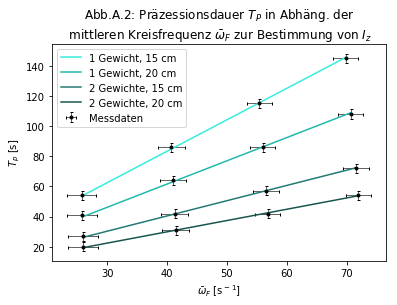

In [5]:
f_F = np.array([700,550,400,250])/60
df_F = 20/60
wa_F = f_F*np.pi*2
dwa_F = 2*np.pi*df_F
l1 = 0.15
l2 = 0.2
l3 = l1
l4 = l2
dl = 0.005
m = 9.85e-3
m1 = m
m2 = m
m3 = 2*m
m4 = 2*m
g = 9.81
dT = 3

T1 = np.array([120+25,60+55,60+26,54]) #T für l = 15cm & n = 1
T2 = np.array([60+48,60+26,60+4,41]) #T für l = 20cm & n = 1 
T3 = np.array([60+12,57,42,27]) #T für l = 15cm & n = 2
T4 = np.array([54,42,31,20]) #T für l = 20cm & n = 2


w1_F = np.array([])
w2_F = np.array([])
w3_F = np.array([])
w4_F = np.array([])
for i in range(4):      #Bestimmung des Mittelwertes von Anfangsfrequenz und Endfrequend(berechnet aus Dämpfung)
    we_F = wa_F[i]*np.exp(-k*T1[i])
    dwe_F = we_F*np.sqrt((dwa_F/wa_F)**2+(k*dT**2)+(T1*dk)**2)
    w1_F = np.append(w1_F,np.mean(np.array([we_F,wa_F[i]]))) 
    dw1_F = np.mean(np.array([dwe_F,dwa_F]))
    we_F = wa_F[i]*np.exp(-k*T2[i])
    dwe_F = we_F*np.sqrt((dwa_F/wa_F)**2+(k*dT**2)+(T2*dk)**2)
    w2_F = np.append(w2_F,np.mean(np.array([we_F,wa_F[i]])))
    dw2_F = np.mean(np.array([dwe_F,dwa_F]))
    we_F = wa_F[i]*np.exp(-k*T3[i])
    dwe_F = we_F*np.sqrt((dwa_F/wa_F)**2+(k*dT**2)+(T3*dk)**2)
    w3_F = np.append(w3_F,np.mean(np.array([we_F,wa_F[i]])))
    dw3_F = np.mean(np.array([dwe_F,dwa_F]))
    we_F = wa_F[i]*np.exp(-k*T4[i])
    dwe_F = we_F*np.sqrt((dwa_F/wa_F)**2+(k*dT**2)+(T4*dk)**2)
    w4_F = np.append(w4_F,np.mean(np.array([we_F,wa_F[i]])))
    dw4_F = np.mean(np.array([dwe_F,dwa_F]))


def linear(x,a):
    return a*x

I_Z = np.array([])
dI_Z = np.array([])

plt.errorbar(w1_F,T1,dT,dw1_F,".", elinewidth = 0.6, capsize = 1.5, color="black", label="Messdaten")
popt,pcov = curve_fit(linear, w1_F, T1)
plt.plot(w1_F, linear(w1_F,*popt), label="1 Gewicht, 15 cm", color="#36ECDD")
I_z = popt[0]*m1*g*l1/(2*np.pi)
dI_z = I_z*np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(dl/l1)**2)
print("I_z = ({:.5f} +/- {:.5f})kg*m^2".format(I_z,dI_z))
print(popt[0],np.sqrt(pcov[0][0]))
I_Z = np.append(I_Z,I_z)
dI_Z = np.append(dI_Z,dI_z)

plt.errorbar(w2_F,T2,dT,dw2_F,".", elinewidth = 0.6, capsize = 1.5, color="black")
popt,pcov = curve_fit(linear, w2_F, T2)
plt.plot(w2_F, linear(w2_F,*popt), label="1 Gewicht, 20 cm", color="#1FB9AC")
I_z = popt[0]*m2*g*l2/(2*np.pi)
dI_z = I_z*np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(dl/l2)**2)
print("I_z = ({:.5f} +/- {:.5f})kg*m^2".format(I_z,dI_z))
print(popt[0],np.sqrt(pcov[0][0]))
I_Z = np.append(I_Z,I_z)
dI_Z = np.append(dI_Z,dI_z)

plt.errorbar(w3_F,T3,dT,dw3_F,".", elinewidth = 0.6, capsize = 1.5, color="black")
popt,pcov = curve_fit(linear, w3_F, T3)
plt.plot(w3_F, linear(w3_F,*popt), label="2 Gewichte, 15 cm", color="#227972")
I_z = popt[0]*m3*g*l3/(2*np.pi)
dI_z = I_z*np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(dl/l3)**2)
print("I_z = ({:.5f} +/- {:.5f})kg*m^2".format(I_z,dI_z))
print(popt[0],np.sqrt(pcov[0][0]))
I_Z = np.append(I_Z,I_z)
dI_Z = np.append(dI_Z,dI_z)

plt.errorbar(w4_F,T4,dT,dw4_F,".", elinewidth = 0.6, capsize = 1.5, color="black")
popt,pcov = curve_fit(linear, w4_F, T4)
plt.plot(w4_F, linear(w4_F,*popt), label="2 Gewichte, 20 cm", color="#16554F")
I_z = popt[0]*m4*g*l4/(2*np.pi)
dI_z = I_z*np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(dl/l4)**2)
print("I_z = ({:.5f} +/- {:.5f})kg*m^2".format(I_z,dI_z))
print(popt[0],np.sqrt(pcov[0][0]))
I_Z = np.append(I_Z,I_z)
dI_Z = np.append(dI_Z,dI_z)

plt.title("Abb.A.2: Präzessionsdauer $T_P$ in Abhäng. der \n mittleren Kreisfrequenz $\\bar \omega_F$ zur Bestimmung von $I_z$")
plt.xlabel("$\\bar \omega$$_F$ [s$^-$$^1$]")
plt.ylabel("$T_p$ [s]")
#2*np.pi/T = w_p = m*g*l/(I_z*w_F) => T/w_f = 2*np.pi*I_z/(m*g*l) 

I_z = np.mean(I_Z)
dI_z_sys = np.mean(dI_Z)
dI_z_stat = np.std(I_Z)/np.sqrt(3)
print("Mittelwert: I_z = ({:.5f} +/- {:.5f} +/- {:.5f})kg*m^2".format(I_z,dI_z_sys,dI_z_stat))

#Berechnen des theoretischen Wertes
r_k = 5.08
m_k = 4164
I_k = 2/5*m_k*r_k**2*10**-7
print("theoretischer Wert: I_z = {:.5f}kg*m^2".format(I_k))
plt.legend()
plt.savefig("213_2.pdf", type="PDF")


## Aufgabe 4: Bestimmung des Trägheitsmomentes $I_x$ nach (7)

I_x = (0.0050 +/- 0.0003)kg*m^2
17.4409947123 0.0691008106687
theoretischer Wert(nach theoretischem I_z): I_x = 0.0045kg*m^2
theoretischer Wert(nach gemessenem I_z): I_x = 0.0049kg*m^2


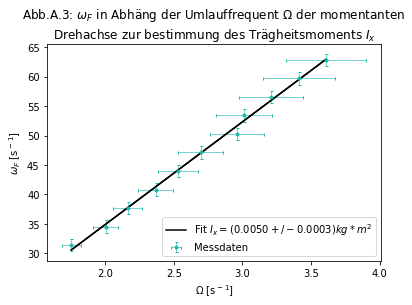

In [6]:
t = np.array([35.81,31.34,29,26.53,24.81,23.29,21.24,20.86,19.58,18.42,17.42])
dt = np.sqrt(2)
T = t/10
dT = dt/10
W = 2*np.pi/T
dW = W*dT/T
f_F = np.array([])
for i in range(11):
    f_F = np.append(f_F,300+i*30)
df_F = 10/60
f_F = f_F/60

w_F = 2*np.pi*f_F
dw_F = 2*np.pi*df_F

plt.errorbar(W,w_F,dw_F,dW,".", elinewidth = 0.6, capsize = 1.5, label="Messdaten", color="#1FB9AC")
popt,pcov = curve_fit(linear,  W,w_F)
plt.plot(W, linear(W,*popt), color="black")
I_x = I_z/(popt[0]-1)+I_z
dI_x = I_x*np.sqrt((dI_z/I_z)**2+np.sqrt(pcov[0,0])/(popt[0]-1))
print("I_x = ({:.4f} +/- {:.4f})kg*m^2".format(I_x,dI_x))
print(popt[0],np.sqrt(pcov[0][0]))
plt.plot(W, linear(W,*popt), color="black", label="Fit $I_x = ({:.4f} +/- {:.4f})kg*m^2$".format(I_x,dI_x))

plt.title("Abb.A.3: $\omega_F$ in Abhäng der Umlauffrequent $\Omega$ der momentanten\nDrehachse zur bestimmung des Trägheitsmoments $I_x$")
plt.xlabel("$\Omega$ [s$^-$$^1$]")
plt.ylabel("$\omega_F$ [s$^-$$^1$]")

#Berechnung theoretischer Wert
rho_al = 2.7 #Dichte Aluminium
r_s = 0.325 #Radius Stab
l_s = 17 #Länge Stab
I_s = rho_al*np.pi*r_s**2*l_s*(l_s**2/3+r_k**2/2)*10**-7
print("theoretischer Wert(nach theoretischem I_z): I_x = {:.4f}kg*m^2".format(I_s+I_k))
print("theoretischer Wert(nach gemessenem I_z): I_x = {:.4f}kg*m^2".format(I_s+I_z))
plt.legend()
plt.savefig("213_3.pdf", type="PDF")

## Aufgabe 5: Bestimmung des Trägheitsmoments $I_x$ nach (5)

I_x = (0.00488 +/- 0.00012)kg*m^2
1.03816531162 0.00409904813518


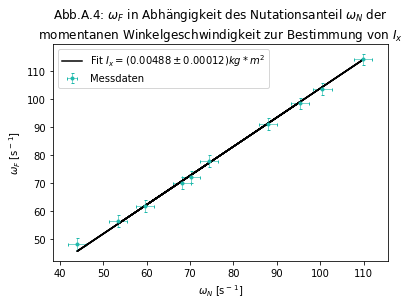

In [7]:
f_F = np.array([744,590,670,460,940,540,1090,990,870,690])/60
df_F = 20/60
f_N = np.array([355,285,325,210,455,255,525,480,420,335])*2/60
df_N = 20/60
w_F = 2*np.pi*f_F
dw_F = 2*np.pi*df_F
w_N = 2*np.pi*f_N
dw_N = 2*np.pi*df_N
plt.errorbar(w_N,w_F,dw_F,dw_N,".", elinewidth = 0.6, capsize = 1.5, label="Messdaten", color="#1FB9AC")
#plt.plot(w_N,w_F,".")
popt,pcov = curve_fit(linear,  w_N,w_F)
plt.plot(w_N, linear(w_N,*popt), color="black")
I_x = popt[0]*I_z
dI_x = I_x*np.sqrt((np.sqrt(pcov[0,0])/popt[0])**2+(dI_z/I_z)**2)
print("I_x = ({:.5f} +/- {:.5f})kg*m^2".format(I_x,dI_x))
print(popt[0],np.sqrt(pcov[0][0]))
plt.plot(w_N, linear(w_N,*popt), color="black",label="Fit $I_x = ({:.5f} \pm {:.5f})kg*m^2$".format(I_x,dI_x))


plt.title("Abb.A.4: $\omega_F$ in Abhängigkeit des Nutationsanteil $\omega_N$ der \nmomentanen Winkelgeschwindigkeit zur Bestimmung von $I_x$")
plt.xlabel("$\omega_N$ [s$^-$$^1$]")
plt.ylabel("$\omega_F$ [s$^-$$^1$]")
plt.legend()
plt.savefig("213_4.pdf", type="PDF")